First, let's import everything we need, and load some boiling point data:

In [1]:
# Import the Graph Operator - handles data preparation, model creation/recall, hand-off of data to model
from graphchem import GraphOperator

In [2]:
# Other dependencies are for data segmentation, set metric calculations, plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# Load some boiling point data
from graphchem.datasets import load_bp
smiles, bp = load_bp()
print(smiles[:3], '\n', bp[:3])

['COC1=C(C(=CC=C1)OC)O', 'CC(CO)O', 'C1=C(OC(=C1)C=O)CO'] 
 [[261.0], [188.2], [115.0]]


In [4]:
# Create training, testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    smiles, bp, test_size=0.20, random_state=42
)
print(len(X_train), len(y_train), len(X_test), len(y_test))

164 164 41 41


We need to set up some variables for our training process (i.e. hyper-parameters). In the future, these will be tunable to reduce model error.

In [5]:
training_config = {
    'task': 'graph',
    'valid_size': 0.2,
    'valid_epoch_iter': 1,
    'valid_patience': 48,
    'batch_size': 32,
    'learning_rate': 0.001,
    'lr_decay': 0.0000001,
    'epochs': 500,
    'verbose': 1
}

We also need to define our model's architecture:

In [6]:
model_config = {
    'n_messages': 2,
    'n_hidden': 3,
    'hidden_msg_dim': 128,
    'hidden_dim': 256,
    'dropout': 0.01
}

Now let's initialize the Graph Operator, and train our model:

In [7]:
go = GraphOperator(config=training_config)
go.train(X_train, y_train, model_config=model_config)

/Users/tjkessler/anaconda3/envs/torch_geometric/lib/python3.8/site-packages/graphchem-1.0.0-py3.8.egg/graphchem/operator.py:43: UserWarning: device config value not found: default value set, cpu
  warnings.warn(


Epoch: 0 | Train Loss: 18931.709174469226 | Valid Loss: 2552.481689453125
Epoch: 1 | Train Loss: 7229.232816972805 | Valid Loss: 2552.481689453125
Epoch: 2 | Train Loss: 2890.3863944716127 | Valid Loss: 2552.481689453125
Epoch: 3 | Train Loss: 3961.2754306938814 | Valid Loss: 2552.481689453125
Epoch: 4 | Train Loss: 4047.176399056238 | Valid Loss: 1710.22119140625
Epoch: 5 | Train Loss: 2707.2440875104367 | Valid Loss: 1710.22119140625
Epoch: 6 | Train Loss: 2362.7919330160125 | Valid Loss: 1710.22119140625
Epoch: 7 | Train Loss: 2307.459964781317 | Valid Loss: 1708.009765625
Epoch: 8 | Train Loss: 2197.4168207299617 | Valid Loss: 1668.715576171875
Epoch: 9 | Train Loss: 1940.8684305671518 | Valid Loss: 1668.715576171875
Epoch: 10 | Train Loss: 1925.1983167342557 | Valid Loss: 1530.70068359375
Epoch: 11 | Train Loss: 2086.1711859084267 | Valid Loss: 1530.70068359375
Epoch: 12 | Train Loss: 2397.741449487118 | Valid Loss: 1530.70068359375
Epoch: 13 | Train Loss: 2157.597443791746 | Vali

Epoch: 111 | Train Loss: 3064.735844502922 | Valid Loss: 488.07281494140625
Epoch: 112 | Train Loss: 1507.7532544318046 | Valid Loss: 488.07281494140625
Epoch: 113 | Train Loss: 1277.259955719227 | Valid Loss: 488.07281494140625
Epoch: 114 | Train Loss: 1036.8736972954437 | Valid Loss: 488.07281494140625
Epoch: 115 | Train Loss: 1111.1091557859465 | Valid Loss: 488.07281494140625
Epoch: 116 | Train Loss: 934.1309902103802 | Valid Loss: 488.07281494140625
Epoch: 117 | Train Loss: 817.7492247137404 | Valid Loss: 488.07281494140625
Epoch: 118 | Train Loss: 2250.076365696565 | Valid Loss: 488.07281494140625
Epoch: 119 | Train Loss: 1331.5517331188871 | Valid Loss: 461.0298156738281
Epoch: 120 | Train Loss: 1102.8731628883886 | Valid Loss: 461.0298156738281
Epoch: 121 | Train Loss: 979.6987565601145 | Valid Loss: 461.0298156738281
Epoch: 122 | Train Loss: 788.497579909463 | Valid Loss: 461.0298156738281
Epoch: 123 | Train Loss: 825.2813469107824 | Valid Loss: 461.0298156738281
Epoch: 124 | 

Let's get predictions, then calculate prediction errors for the training and testing subsets:

In [8]:
y_train_pred = go.use(X_train)
y_test_pred = go.use(X_test)

mae_test = median_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = median_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test Set: R2 = {}, MAE = {}'.format(r2_test, mae_test))
print('Train Set: R2 = {}, MAE = {}'.format(r2_train, mae_train))

Test Set: R2 = 0.8344013398176608, MAE = 13.503341674804688
Train Set: R2 = 0.8855013602748739, MAE = 11.009143066406253


And let's plot our results:

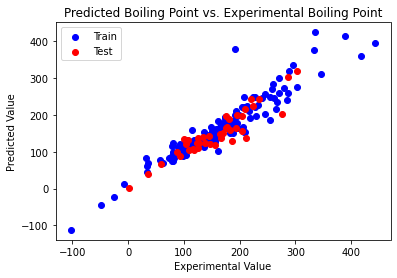

In [9]:
plt.title('Predicted Boiling Point vs. Experimental Boiling Point')
plt.xlabel('Experimental Value')
plt.ylabel('Predicted Value')
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.legend(loc='upper left')
plt.show()